In [5]:
import pandas as pd, numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
pd.set_option("display.max_columns", 120)
print("pandas", pd.__version__)
print("numpy ", np.__version__)


pandas 2.2.2
numpy  1.26.4


In [6]:
from pathlib import Path

def detect_csvs(project_root=Path(".")):
    cand_roots = [project_root, project_root/"data", Path("."), Path("..")]
    names = {
        "tran": "dcpc_2024_tranlevel_public.csv",
        "day":  "dcpc_2024_daylevel_public.csv",
        "ind":  "dcpc_2024_indlevel_public.csv",
    }
    paths = {}
    for key, fn in names.items():
        found = None
        for r in cand_roots:
            p = (r/fn)
            if p.exists():
                found = p.resolve()
                break
        if found is None:
            p = project_root/"data"/fn
            if p.exists():
                found = p.resolve()
        paths[key] = found
    return paths

# 如果 notebook 放在 notebooks/ 目录下，project_root 传 ".."
paths = detect_csvs(Path(".."))
print("Detected CSV paths:")
pprint(paths)

if not all(paths.values()):
    missing = [k for k,v in paths.items() if v is None]
    raise FileNotFoundError(f"Missing CSV(s): {missing}. Put CSVs under dcpc_dml_repo/data or project root.")
tran_path, day_path, ind_path = paths["tran"], paths["day"], paths["ind"]
tran_path, day_path, ind_path


Detected CSV paths:
{'day': WindowsPath('D:/ME 2026 UBC/CPSC 532 Y/project_git/dcpc-friction-dml/data/dcpc_2024_daylevel_public.csv'),
 'ind': WindowsPath('D:/ME 2026 UBC/CPSC 532 Y/project_git/dcpc-friction-dml/data/dcpc_2024_indlevel_public.csv'),
 'tran': WindowsPath('D:/ME 2026 UBC/CPSC 532 Y/project_git/dcpc-friction-dml/data/dcpc_2024_tranlevel_public.csv')}


(WindowsPath('D:/ME 2026 UBC/CPSC 532 Y/project_git/dcpc-friction-dml/data/dcpc_2024_tranlevel_public.csv'),
 WindowsPath('D:/ME 2026 UBC/CPSC 532 Y/project_git/dcpc-friction-dml/data/dcpc_2024_daylevel_public.csv'),
 WindowsPath('D:/ME 2026 UBC/CPSC 532 Y/project_git/dcpc-friction-dml/data/dcpc_2024_indlevel_public.csv'))

In [7]:
tran = pd.read_csv(tran_path, low_memory=False)
day  = pd.read_csv(day_path,  low_memory=False)
ind  = pd.read_csv(ind_path,  low_memory=False)

print("Shapes:")
print("  tran:", tran.shape)
print("  day :", day.shape)
print("  ind :", ind.shape)

tran.head(3)


Shapes:
  tran: (32267, 67)
  day : (22332, 86)
  ind : (5583, 292)


,id,old_diary_day,date,tran,tran_report,amnt_orig,payamnt_erramnt,pi,amnt,amnt_flag,merch,cc_surcharge,q101ee,device,time,in_person,diary_day,mobile_method,authorization_method,pay010,pay011,pay082,p2p_type,p2p_business,ccbaldue,enough_cash,accept_cash,accept_card,dc_rewards,used_rewards_cc,used_revolve_cc,cc_discount,prepaid_logo,mobile_funding,mobile_app,monord_source,monord_date,why_multipi,billautom,bill,payee,multipi_breakdown,discount,tran_min,paylocaltime,payment,module,start_date,nonpaymenttran,cashdepmethod,cashdeptime,cashdepaccount,chkdepfunds,cashgetlocation,cashgetsource,cashgetfee,cashgettime,chktransferaccount,chktransferfee,chktransferwhenrec,chktransferinstitution,q211paymeth,uncommon_pi_type,prepaidloadmethod,prepaidloadlocation,prepaidloadfee,transaction_reported_on_day
0,103858,1,2024-09-29,1,1.0,50.0,NaN,2.0,50.0,NaN,17.0,NaN,NaN,7.0,12:00 AM,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,NaN,00:00,1,bills_purchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,104674,1,2024-09-29,1,1.0,8.0,NaN,11.0,8.0,NaN,15.0,NaN,NaN,1.0,12:00 AM,0.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,00:00,1,bills_purchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,101352,1,2024-09-29,1,1.0,5.0,NaN,4.0,5.0,NaN,1.0,NaN,2.0,7.0,12:00 AM,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,0.0,0.0,00:00,1,bills_purchases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
def null_rate(df, top=20):
    return (df.isna().mean().sort_values(ascending=False)
            .head(top).rename("null_rate"))

print("Top null-rate columns (TRAN):")
print(null_rate(tran).to_string())
print("\nTop null-rate columns (DAY):")
print(null_rate(day).to_string())
print("\nTop null-rate columns (IND):")
print(null_rate(ind).to_string())


Top null-rate columns (TRAN):
uncommon_pi_type          0.999008
q211paymeth               0.999008
monord_source             0.998667
monord_date               0.998667
prepaidloadfee            0.997583
prepaidloadlocation       0.997490
prepaidloadmethod         0.997490
multipi_breakdown         0.996095
why_multipi               0.996064
p2p_business              0.992624
cashdepmethod             0.992004
cashdeptime               0.991973
cashdepaccount            0.991973
chktransferwhenrec        0.986364
chktransferinstitution    0.986209
chktransferfee            0.985930
chktransferaccount        0.985682
pay011                    0.983668
amnt_flag                 0.981963
payamnt_erramnt           0.981870

Top null-rate columns (DAY):
inc_amnt_alimony             1.000000
inc_method_alimony           1.000000
inc_method_childsupport      0.998567
inc_amnt_childsupport        0.998567
inc_method_otherretire       0.997940
inc_amnt_otherretire         0.997806
inc_method_r

In [9]:
def pick(df, opts):
    for c in opts:
        if c in df.columns: return c
    return None

ID_COLS  = ["_id","id","person_id","PID"]
DATE_COL = ["_date","date"]
AMT_COL  = ["_amount","amount","amnt"]

t_id   = pick(tran, ID_COLS);  d_id   = pick(day, ID_COLS);  i_id = pick(ind, ID_COLS)
t_date = pick(tran, DATE_COL); d_date = pick(day, DATE_COL)

print("Guessed columns:")
print("  tran:", t_id, t_date, pick(tran, AMT_COL))
print("  day :", d_id, d_date, pick(day, AMT_COL))
print("  ind :", i_id)

# 时间列转型
if t_date: tran[t_date] = pd.to_datetime(tran[t_date], errors="coerce")
if d_date: day[d_date]  = pd.to_datetime(day[d_date],  errors="coerce")

# 人数一致性
n_person_tran = tran[t_id].nunique() if t_id else None
n_person_day  = day[d_id].nunique() if d_id else None
n_person_ind  = ind[i_id].nunique() if i_id else None
print("\nUnique persons — tran/day/ind:", n_person_tran, n_person_day, n_person_ind)
if i_id and d_id:
    print("day ⊆ ind ?", day[d_id].isin(ind[i_id]).all())

# 每人有效天数分布（DAY）
if d_id and d_date:
    per_days = day.groupby(d_id)[d_date].nunique().rename("n_days")
    print("\nPer-person #days describe:")
    print(per_days.describe())


Guessed columns:
  tran: id date amnt
  day : id date None
  ind : id

Unique persons — tran/day/ind: 5127 5583 5583
day ⊆ ind ? True

Per-person #days describe:
count    5583.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: n_days, dtype: float64


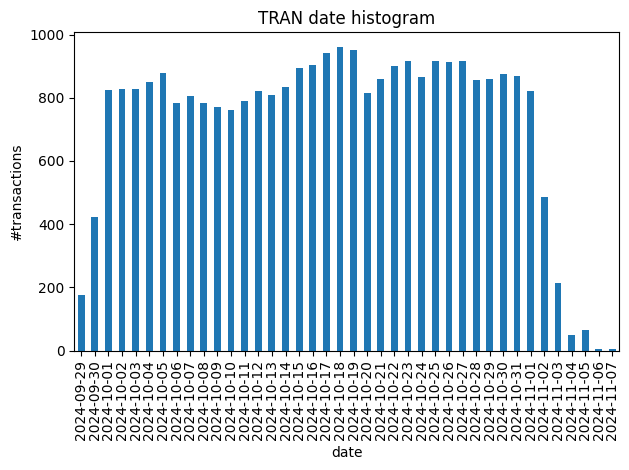

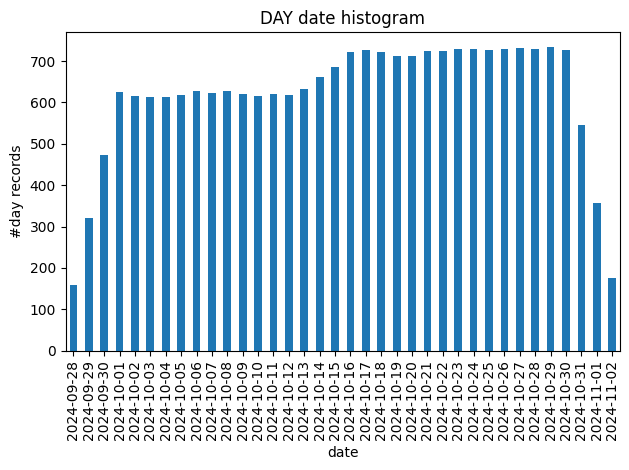

In [10]:
# 只用 matplotlib，单图无子图、不设特定颜色（便于一致风格）
if t_date:
    plt.figure()
    tran[t_date].dt.date.value_counts().sort_index().plot(kind="bar")
    plt.title("TRAN date histogram")
    plt.xlabel("date"); plt.ylabel("#transactions")
    plt.tight_layout(); plt.show()

if d_date:
    plt.figure()
    day[d_date].dt.date.value_counts().sort_index().plot(kind="bar")
    plt.title("DAY date histogram")
    plt.xlabel("date"); plt.ylabel("#day records")
    plt.tight_layout(); plt.show()


In [11]:
# DAY 层：person-day 是否有重复行
dup = 0
if d_id and d_date:
    dup = day.duplicated(subset=[d_id, d_date]).sum()
print("Duplicate person-day rows in DAY:", dup)

# TRAN 层：金额分布
a_col = pick(tran, ["_amount","amount","amnt"])
if a_col:
    amt = pd.to_numeric(tran[a_col], errors="coerce")
    print("Amount describe (TRAN):")
    print(amt.describe())

# 可选：支付/非支付标记
for c in ["payment","nonpaymenttran"]:
    if c in tran.columns:
        print(f"Value counts for {c} (TRAN):")
        print(tran[c].value_counts(dropna=False))


Duplicate person-day rows in DAY: 0
Amount describe (TRAN):
count    32267.000000
mean       234.809685
std       1087.309032
min       -100.000000
25%         13.590000
50%         35.000000
75%        103.300000
max      63521.000000
Name: amnt, dtype: float64
Value counts for payment (TRAN):
payment
1    28810
0     3457
Name: count, dtype: int64
Value counts for nonpaymenttran (TRAN):
nonpaymenttran
NaN    28810
1.0     2993
2.0      361
3.0       69
4.0       23
5.0       11
Name: count, dtype: int64
